In [1]:
import torch
import torch.nn.functional as F
from pyPDMP.models import VAE
from pyPDMP.utils import loss_function

import matplotlib.pyplot as plt
import torchvision
import torchvision.datasets as datasets

In [2]:
m = VAE()#.cuda()

In [3]:
m

VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)

## Training the VAE

In [4]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()
    ])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=32, 
                                          shuffle=True)

In [6]:
size = 28*28

def train(m, loader, epoch):
    optimizer = torch.optim.Adam(m.parameters(), lr=1e-3)
    m.train()
    train_loss = 0
    for batch_idx, (x, _) in enumerate(loader):
        # flatten the batch
        x = x.view(-1, size)
        optimizer.zero_grad()
        recon_batch, mu, logvar = m(x)
        loss = loss_function(recon_batch, x, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(loader.dataset),
                100. * batch_idx / len(loader),
                loss.item() / len(x)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(loader.dataset)))

In [7]:
train(m, data_loader, 10)

Train Epoch: 10 [0/60000 (0%)]	Loss: 549.627625
Train Epoch: 10 [3200/60000 (5%)]	Loss: 184.497803
Train Epoch: 10 [6400/60000 (11%)]	Loss: 177.050995
Train Epoch: 10 [9600/60000 (16%)]	Loss: 142.868423
Train Epoch: 10 [12800/60000 (21%)]	Loss: 147.779877
Train Epoch: 10 [16000/60000 (27%)]	Loss: 151.464111
Train Epoch: 10 [19200/60000 (32%)]	Loss: 128.864929
Train Epoch: 10 [22400/60000 (37%)]	Loss: 134.548721
Train Epoch: 10 [25600/60000 (43%)]	Loss: 135.160309
Train Epoch: 10 [28800/60000 (48%)]	Loss: 120.418396
Train Epoch: 10 [32000/60000 (53%)]	Loss: 126.052155
Train Epoch: 10 [35200/60000 (59%)]	Loss: 125.479019
Train Epoch: 10 [38400/60000 (64%)]	Loss: 112.062943
Train Epoch: 10 [41600/60000 (69%)]	Loss: 125.385208
Train Epoch: 10 [44800/60000 (75%)]	Loss: 117.159813
Train Epoch: 10 [48000/60000 (80%)]	Loss: 112.711296
Train Epoch: 10 [51200/60000 (85%)]	Loss: 121.607925
Train Epoch: 10 [54400/60000 (91%)]	Loss: 108.122177
Train Epoch: 10 [57600/60000 (96%)]	Loss: 119.028412
==

In [8]:
x = data_loader.dataset.data[1]
y = m(x.float().view(-1,size))[0].view(28,28)

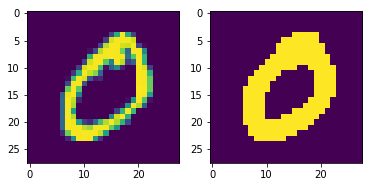

In [9]:
plt.figure()
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(y.detach().numpy())